# 0.0 IMPORTS

In [33]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import inflection
import matplotlib.pyplot as plt
import warnings
import openpyxl
from IPython.core.display import HTML

from datetime import datetime, timedelta


## 0.1 Helper Fuctions

In [34]:
def data_types(df1):
    #abertura
    df1['abertura'] = df1['abertura'].apply(lambda x: x.replace(',', '.') if isinstance(x, str) else x)
    df1['abertura'] = df1['abertura'].apply(lambda x: x.replace('.', '') if isinstance(x, str) else x)
    df1['abertura'] = df1['abertura'].astype(float)

    #maximo
    df1['maximo'] = df1['maximo'].apply(lambda x: x.replace(',', '.') if isinstance(x, str) else x)
    df1['maximo'] = df1['maximo'].apply(lambda x: x.replace('.', '') if isinstance(x, str) else x)
    df1['maximo'] = df1['maximo'].astype(float)

    #minimo
    df1['minimo'] = df1['minimo'].apply(lambda x: x.replace(',', '.') if isinstance(x, str) else x)
    df1['minimo'] = df1['minimo'].apply(lambda x: x.replace('.', '') if isinstance(x, str) else x)
    df1['minimo'] = df1['minimo'].astype(float)

    #fechamento
    df1['fechamento'] = df1['fechamento'].apply(lambda x: x.replace(',', '.') if isinstance(x, str) else x)
    df1['fechamento'] = df1['fechamento'].apply(lambda x: x.replace('.', '') if isinstance(x, str) else x)
    df1['fechamento'] = df1['fechamento'].astype(float)

    #volume
    df1['volume'] = df1['volume'].apply(lambda x: x.replace(".", "").replace(",", "."))
    df1['volume'] = df1['volume'].astype(float)

    #quantidade
    df1['quantidade'] = df1['quantidade'].apply(lambda x: x.replace(".", "") if isinstance(x, str) else x)
    df1['quantidade'] = df1['quantidade'].apply(lambda x: float(x))

    #data
    df1['data'] = df1['data'].apply(lambda x: x.replace('/','-'))
    df1['data'] = df1['data'].apply(lambda x: datetime.strptime(x, "%d-%m-%Y"))
    df1['data'] = pd.to_datetime(df1['data'], format='%d-%m-%Y')
    df1['hora'] = df1['hora'].apply(lambda x: datetime.strptime(x, "%H:%M:%S"))
    
    return df1

def rename_columns(df1):
    cols_old = df1.columns
    cols_new = cols_old.map(lambda x: inflection.underscore(x))
    df1.columns = cols_new
    df1 = df1.rename(columns={'máximo': 'maximo', 'mínimo':'minimo'})
    
    return df1

def changing_time(df1):
    #Horário de verão 2023-03-13
    hora_leilao = (df1['hora'].dt.hour >= 10) & (df1['hora'].dt.hour <= 11) 
    df1 = df1.loc[hora_leilao,:]
    return df1

def clean_futuros(df_win):
    cols_old = df_win.columns
    cols_new = cols_old.map(lambda x: inflection.underscore(x))
    df_win.columns = cols_new
    df_win = df_win.rename(columns={'máximo': 'maximo', 'mínimo':'minimo'})

    df_win['abertura'] = df_win['abertura'].astype(float)

    #maximo

    df_win['maximo'] = df_win['maximo'].astype(float)

    #minimo

    df_win['minimo'] = df_win['minimo'].astype(float)

    #fechamento

    df_win['fechamento'] = df_win['fechamento'].astype(float)

    #volume
    df_win['volume'] = df_win['volume'].apply(lambda x: x.replace(".", "").replace(",", "."))
    df_win['volume'] = df_win['volume'].astype(float)

    #quantidade
    df_win['quantidade'] = df_win['quantidade'].apply(lambda x: x.replace(".", "") if isinstance(x, str) else x)
    df_win['quantidade'] = df_win['quantidade'].apply(lambda x: float(x))

    #data
    df_win['data'] = df_win['data'].apply(lambda x: x.replace('/','-'))
    df_win['data'] = df_win['data'].apply(lambda x: datetime.strptime(x, "%d-%m-%Y"))
    df_win['data'] = pd.to_datetime(df_win['data'], format='%d-%m-%Y')
    df_win['hora'] = df_win['hora'].apply(lambda x: datetime.strptime(x, "%H:%M:%S"))
    df_win['variacao'] = (df_win['fechamento'] - df_win['abertura']) / df_win['abertura']
    
    
   #Horário de verão 2023-03-13
    hora_leilao = (df_win['hora'].dt.hour >= 10) & (df_win['hora'].dt.hour < 11) 
    df_win = df_win.loc[hora_leilao,:]
    
    df_win['variacao'] = (df_win['fechamento'] - df_win['abertura']) / df_win['abertura']
    
    return df_win

palette = ["#00BFFF", "#DC143C", "#FFA07A", "#FFD700", "#8B008B", "#7CFC00", "#FF69B4", "#00CED1", "#FF6347", "#9400D3"]
def jupyter_settings(palette):
    %matplotlib inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [12, 6]
    pd.options.display.max_columns = None
    pd.options.display.max_rows = 50
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set(font_scale=2)
    sns.set_theme(palette=palette)
    warnings.simplefilter("ignore")
    # plt.rcParams.update({'font.size': 10})
    sns.set_style("white")

    
jupyter_settings(palette)

## 0.2 Loading Data

In [35]:
path = 'C:/Users/edils/repos/leilao_fechamento/data/5_minutos/'
df_raw_list = []

for file in os.listdir(path):
    if file.endswith('.csv'):
        filename_path = os.path.join(path, file)
        df = pd.read_csv(filename_path, encoding='iso-8859-1', sep=';')
        df_raw_list.append(df)
df_raw = pd.concat(df_raw_list, axis=0)        

In [36]:
df_raw.head()

,Ativo,Data,Hora,Abertura,Máximo,Mínimo,Fechamento,Volume,Quantidade
0,AALR3,06/06/2023,11:20:00,"23,17","23,17","23,17","23,17","4.634,00",200.0
1,AALR3,06/06/2023,11:15:00,"23,17","23,19","23,16","23,17","69.494,00",3.0
2,AALR3,06/06/2023,11:10:00,"23,19","23,19","23,18","23,18","13.912,00",600.0
3,AALR3,06/06/2023,11:05:00,"23,19","23,21","23,19","23,21","18.559,00",800.0
4,AALR3,06/06/2023,11:00:00,"23,19","23,21","23,19","23,21","34.793,00",1.5


# 1.0 Clean Dataset

In [37]:
df1 = df_raw.copy()

In [38]:
df1 = rename_columns(df1)
df1 = data_types(df1)
df1 = changing_time(df1)
df1['variacao'] = (df1['fechamento'] - df1['abertura']) / df1['abertura']

In [39]:
# df_win = pd.read_csv('C:/Users/edils/repos/leilao_fechamento/data/futuros/WINFUT_F_0_5min.csv', encoding='iso-8859-1', sep=';')
# df_win = clean_futuros(df_win)
# df1 = pd.merge(df1, df_win[['data','hora','variacao']], on=['data','hora'], how='left')
# df1 = df1.rename(columns={'variacao_x':'variacao', 'variacao_y':'variacao_win'})
# df1 = df1.dropna()

In [40]:
df1.head()

,ativo,data,hora,abertura,maximo,minimo,fechamento,volume,quantidade,variacao
0,AALR3,2023-06-06,1900-01-01 11:20:00,2317.0,2317.0,2317.0,2317.0,4634.0,200.0,0.000000
1,AALR3,2023-06-06,1900-01-01 11:15:00,2317.0,2319.0,2316.0,2317.0,69494.0,3.0,0.000000
2,AALR3,2023-06-06,1900-01-01 11:10:00,2319.0,2319.0,2318.0,2318.0,13912.0,600.0,-0.000431
3,AALR3,2023-06-06,1900-01-01 11:05:00,2319.0,2321.0,2319.0,2321.0,18559.0,800.0,0.000862
4,AALR3,2023-06-06,1900-01-01 11:00:00,2319.0,2321.0,2319.0,2321.0,34793.0,1.5,0.000862


# 2.0 Correlation

In [41]:
df2 = df1.copy()

In [42]:
df2 = df2.drop(columns={'abertura','fechamento','maximo','minimo','fechamento','volume','quantidade'}, axis=1)
df2 = df2.sort_values(by=['ativo','data','hora'])

In [43]:
pivot_df = df2.pivot(index=['hora','data'], columns='ativo', values='variacao')

In [49]:
#minerio
df_minerio = pivot_df.loc[:,['GOAU4','GGBR4','CSNA3','VALE3','BRAP4','USIM5','CMIN3','WINFUT','WDOFUT','DI1FUT']]

#areas
df_areas = pivot_df.loc[:,['AZUL4','GOLL4','EMBR3','CVCB3','WINFUT','WDOFUT','DI1FUT']]

#frigorificos
df_frigo = pivot_df.loc[:,['JBSS3','BEEF3','MRFG3','BRFS3','WINFUT','WDOFUT','DI1FUT','BGIFUT']]

#petroleo
df_petro = pivot_df.loc[:,['PETR4','PETR3','RRRP3','RECV3','PRIO3','ENAT3','WINFUT','WDOFUT','DI1FUT']]

#Construção
df_construcao = pivot_df.loc[:,['HBOR3','TCSA3','JHSF3','TRIS3','MTRE3','EVEN3','GFSA3','MDNE3','TEND3','MRVE3','CURY3','EZTC3','DIRR3','CYRE3','WDOFUT','DI1FUT']]

#varejo
df_varejo = pivot_df.loc[:,['AMAR3','AMER3','VIIA3','MGLU3','CEAB3','SOMA3','SBFG3','LREN3','ARZZ3','WINFUT','WDOFUT','DI1FUT']]

#saúde
df_saude = pivot_df.loc[:,['HAPV3','QUAL3','ODPV3','FLRY3','AALR3','RADL3','HYPE3','WINFUT','WDOFUT','DI1FUT']]

#tec
df_tec = pivot_df.loc[:,['POSI3','LWSA3','SQIA3','TOTS3','SIMH3','WINFUT','WDOFUT','DI1FUT']]

#bancos
df_bancos = pivot_df.loc[:,['BMGB4','BPAN4','ITSA4','BRSR6','BBDC4','ABCB4','ITUB4','BPAC11','SANB11','BBAS3','WINFUT','WDOFUT','DI1FUT']]

#elétricas
df_eletricas = pivot_df.loc[:,['LIGT3','CPLE3','CPLE6','MEGA3','ENEV3','CMIG4','NEOE3','CMIG3','ENBR3','TRPL4','EQTL3','ALUP11','CPFE3','ELET3','TAEE11','EGIE3','ENGI11','WINFUT','WDOFUT','DI1FUT']]

#saneamento
df_saneamento = pivot_df.loc[:,['CSMG3','SAPR11','SBSP3','WINFUT','WDOFUT','DI1FUT']]

#seguradoras
df_seguradora = pivot_df.loc[:,['PSSA3','BBSE3','IRBR3','WINFUT','WDOFUT','DI1FUT']]

#shopping
df_shopping = pivot_df.loc[:,['IGTI11','ALSO3','LOGG3','MULT3','BRPR3','WINFUT','WDOFUT','DI1FUT']]

#estatais
df_estatais = pivot_df.loc[:,['CSMG3','SAPR11','PETR4','BBSE3','ELET3','ELET6','BBAS3','WINFUT','WDOFUT','DI1FUT']]

#locadoras
df_locadora = pivot_df.loc[:,['MOVI3','RENT3','WINFUT','WDOFUT','DI1FUT']]

#Celulose
df_celulose = pivot_df.loc[:,['KLBN11','SUZB3','RANI3','WINFUT','WDOFUT','DI1FUT']]



In [45]:
# fig, axes = plt.subplots(nrows=5, ncols=3, figsize(12,18))

# dfs = [df_minerio, df_areas,df_frigo,df_petro,df_construcao,df_varejo,df_saude,
#        df_tec,df_bancos,df_eletricas,df_saneamento,df_seguradora,df_shopping,df_estatais,df_locadora,df_celulose]



# sns.heatmap(df_minerio.corr(method='pearson'), annot=True, cmap='BrBG')
# plt.title('Mineradoras')

# plt.subplot(2,2,2)
# sns.heatmap(df_areas.corr(method='pearson'), annot=True, cmap='BrBG')
# plt.title('Aéreas')

# plt.subplot(2,2,3)
# sns.heatmap(df_frigo.corr(method='pearson'), annot=True, cmap='BrBG')
# plt.title('Frigorífico')

# plt.subplot(2,2,4)
# sns.heatmap(df_petro.corr(method='pearson'), annot=True, cmap='BrBG')
# plt.title('Petroleiras')

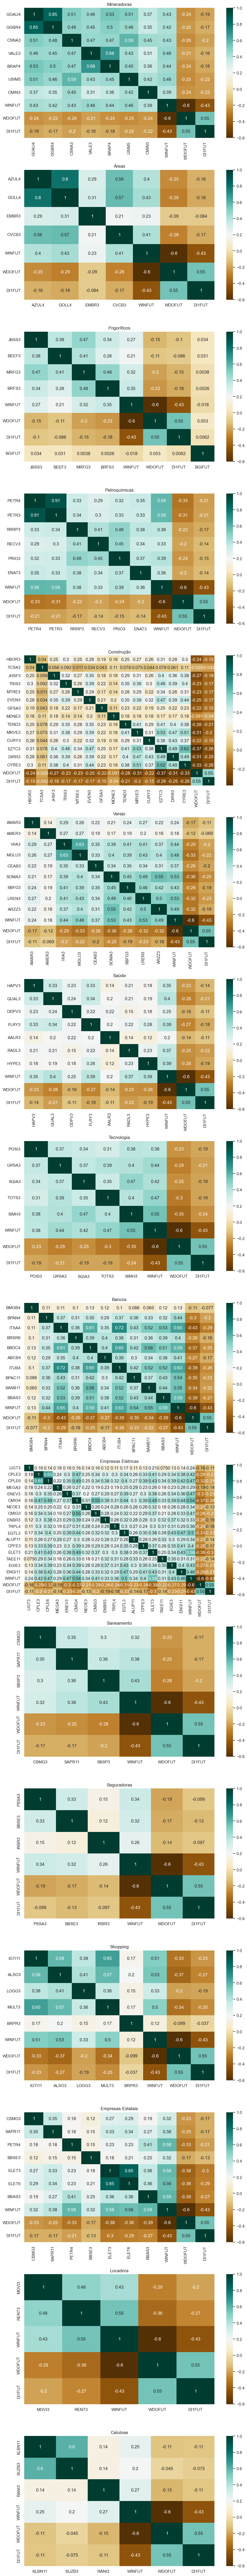

In [50]:


dfs = [df_minerio, df_areas, df_frigo, df_petro, df_construcao, df_varejo, df_saude,
       df_tec, df_bancos, df_eletricas, df_saneamento, df_seguradora, df_shopping, df_estatais, df_locadora,df_celulose]

titles = ['Mineradoras', 'Áreas', 'Frigoríficos', 'Petroquímicas', 'Construção', 'Varejo', 'Saúde',
          'Tecnologia', 'Bancos', 'Empresas Elétricas', 'Saneamento', 'Seguradoras', 'Shopping', 'Empresas Estatais', 'Locadora','Celulose']

fig, axes = plt.subplots(nrows=len(dfs), figsize=(10, 6 * len(dfs)))

correlation_scores = []


for i, (df, title) in enumerate(zip(dfs, titles)):
    ax = axes[i]
    sns.heatmap(df.corr(method='pearson'), ax=ax, annot=True, cmap='BrBG')
    ax.set_title(title)
    ax.set_xlabel('')  # Remover rótulos do eixo x para melhor legibilidade
    ax.set_ylabel('')  # Remover rótulos do eixo y para melhor legibilidade    

plt.tight_layout()
plt.show()

In [47]:
dfs = [df_minerio, df_areas, df_frigo, df_petro, df_construcao, df_varejo, df_saude,
       df_tec, df_bancos, df_eletricas, df_saneamento, df_seguradora, df_shopping, df_estatais, df_locadora]

titles = ['Mineradoras', 'Áreas', 'Frigoríficos', 'Petroquímicas', 'Construção', 'Varejo', 'Saúde',
          'Tecnologia', 'Bancos', 'Empresas Elétricas', 'Saneamento', 'Seguradoras', 'Shopping', 'Empresas Estatais', 'Locadora']

correlation_scores = []  # Lista para armazenar os scores de correlação

for i, (df, title) in enumerate(zip(dfs, titles)):
    correlation_matrix = df.corr(method='pearson')
    correlation_scores.append(correlation_matrix)

# Criar um objeto pandas DataFrame com os valores de correlação
df_correlation = pd.concat(correlation_scores, keys=titles)

# Exportar para um arquivo Excel
df_correlation.to_excel('correlation_scores.xlsx')

In [48]:
# correlation_matrix_full = pivot_df.corr(method='pearson')
# correlation_matrix_full.to_excel('correlation_full.xlsx')